# Google Play Store App Dataset

This is the Google Play Store App Dataset wich i\I'm are going to explore and analize. 

With this Dataset, we will try to asnwer the following questions:

1. Does the rating of an app depend on the number of downloads of it?
2. Does the downloads depend on the price of the app?

## Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
from scipy.stats import shapiro

%matplotlib inline

## File Opening

In [2]:
# File opening

df = pd.read_csv('googleplaystore.csv')

copy_df = pd.read_csv('googleplaystore.csv')

## Dataframe Information

In [3]:
# First numbers of observations in dataset

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Last numbers of observations in dataset

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
print("Shape of dataframe: ", df.shape)

Shape of dataframe:  (10841, 13)


In [6]:
# Find the total number of na values in dataframe

print("Total of na values in dataframe: ",df.isna().sum().sum())

Total of na values in dataframe:  1487


In [7]:
# Types of the dataframe

print("   ------ Types ------")
df.dtypes

   ------ Types ------


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Missing Data

In [8]:
# Missing data

print("------ Missing data ------")
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

------ Missing data ------


,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


## Cleaning Data

### Removing missing data

In [9]:
df.dropna(how ='any', inplace = True)

### Price Column

In [10]:
print("Unique values of Price: \n", df['Price'].unique())

Unique values of Price: 
 ['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']


In [11]:
# Remove the dollar sign for all the values of price column

df.Price = df.Price.str.strip('$')

# As we see above, there is a value 'Everyone', that's a free app, so we will replace that with a 0.

df.Price = df.Price.str.replace('Everyone', '0')

In [12]:
# Set float to all string values of the price column

df['Price'] = df['Price'].astype(float)

### Type Column

In [13]:
print("Unique values of Type: \n", df['Type'].unique())

Unique values of Type: 
 ['Free' 'Paid']


In [14]:
# Replace the Free and Paid value to 0 and 1, so we can compute them

df.Type = df.Type.str.replace('Free', '0')

df.Type = df.Type.str.replace('Paid', '1')

In [15]:
# Set int to all string values of the Type column

df['Type'] = df['Type'].astype(int)

### Rating Column

In [16]:
print("Unique values of Rating: \n", df['Rating'].unique())

Unique values of Rating: 
 [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]


In [17]:
# Set int to all string values of the Rating column

df['Rating'] = df['Rating'].astype(float)

### Installs Column

In [18]:
print("Unique values of Installs: \n", df['Installs'].unique())

Unique values of Installs: 
 ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']


In [19]:
# Replace all the symbols from the Installs column

df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))

In [20]:
# Sort the values of the installs column to make them cat.

Sorted_ = sorted(list(df['Installs'].unique()))

df['Installs'].replace(Sorted_,range(0,len(Sorted_),1), inplace = True )

In [21]:
# Set int to all string values of the Installs column

df['Installs'] = df['Installs'].astype(int)

df['Installs'] 

0         4
1        15
2        16
3        17
4         5
         ..
10834    12
10836    13
10837     2
10839     3
10840     7
Name: Installs, Length: 9360, dtype: int32

### Category Column

For this column, we will use th copy of the dataframe...

#### One Hot Encoding

In [22]:
# for dummy variable encoding for Categories

df_copy = pd.get_dummies(df, columns=['Category'])

df_copy.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,4,0,0.0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,15,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,16,0,0.0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,17,0,0.0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,5,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


### Size Column

In [23]:
print("Unique values of Size: \n", df['Size'].unique())

Unique values of Size: 
 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '5

In [24]:
# Scaling and Cleaning Size column

def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)
df.Size.fillna(method = 'ffill', inplace = True) 

### Content Rating

In [25]:
print("Unique values of Content Rating: \n", df['Content Rating'].unique())

Unique values of Content Rating: 
 ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [26]:
# Cleaning of content rating classification

RatingL = df['Content Rating'].unique()
RatingDict = {}

for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

### Content Rating Dictionary

In [27]:
print("Content Rating Dictionary")
RatingDict

Content Rating Dictionary


{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

### Genres Column

In [28]:
print("Unique values of Genres: \n", df['Genres'].unique())

Unique values of Genres: 
 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain G

In [29]:
#Cleaning of genres

GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
    
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

### Genres Dictionary

In [30]:
print("Genres Dictionary")
GenresDict

Genres Dictionary


{'Art & Design': 0,
 'Art & Design;Pretend Play': 1,
 'Art & Design;Creativity': 2,
 'Auto & Vehicles': 3,
 'Beauty': 4,
 'Books & Reference': 5,
 'Business': 6,
 'Comics': 7,
 'Comics;Creativity': 8,
 'Communication': 9,
 'Dating': 10,
 'Education;Education': 11,
 'Education': 12,
 'Education;Creativity': 13,
 'Education;Music & Video': 14,
 'Education;Action & Adventure': 15,
 'Education;Pretend Play': 16,
 'Education;Brain Games': 17,
 'Entertainment': 18,
 'Entertainment;Music & Video': 19,
 'Entertainment;Brain Games': 20,
 'Entertainment;Creativity': 21,
 'Events': 22,
 'Finance': 23,
 'Food & Drink': 24,
 'Health & Fitness': 25,
 'House & Home': 26,
 'Libraries & Demo': 27,
 'Lifestyle': 28,
 'Lifestyle;Pretend Play': 29,
 'Adventure;Action & Adventure': 30,
 'Arcade': 31,
 'Casual': 32,
 'Card': 33,
 'Casual;Pretend Play': 34,
 'Action': 35,
 'Strategy': 36,
 'Puzzle': 37,
 'Sports': 38,
 'Music': 39,
 'Word': 40,
 'Racing': 41,
 'Casual;Creativity': 42,
 'Casual;Action & Adven

### Reviews Column

In [31]:
# Set int to all string values of the Reviews column

df['Reviews'] = df['Reviews'].astype(int)

### Dropping unrelated and unnecessary items

In [32]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver'], axis = 1, inplace = True)

### Data after imputation and cleaning

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Genres_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,4,0,0.0,0,Art & Design,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,15,0,0.0,0,Art & Design;Pretend Play,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,16,0,0.0,0,Art & Design,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,17,0,0.0,1,Art & Design,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,5,0,0.0,0,Art & Design;Creativity,2


In [34]:
# Unique values and NA's after replacing the missing values and NaN's

print("{0:<13}       {1:<23}    {2}".format("VARIABLE","UNIQUE VALUES","NAs"))
for col in df.columns:
    print("{0:<13}            {1:<23}{2}".format(col, df[col].nunique(), df[col].isna().sum()))

VARIABLE            UNIQUE VALUES              NAs
App                      8190                   0
Category                 33                     0
Rating                   39                     0
Reviews                  5990                   0
Size                     411                    0
Installs                 19                     0
Type                     2                      0
Price                    73                     0
Content Rating            6                      0
Genres                   115                    0
Genres_c                 115                    0


In [35]:
# Types of the dataframe before data cleaning
print("   ------ Types ------")
df.dtypes

   ------ Types ------


App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                int32
Price             float64
Content Rating      int32
Genres             object
Genres_c            int32
dtype: object

In [36]:
print("Shape of dataframe: ", df.shape)

Shape of dataframe:  (9360, 11)


In [37]:
# Basic metrics 

df.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres_c
count,9360.000000,9.360000e+03,9.360000e+03,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000
mean,4.191838,5.143767e+05,2.314347e+07,8.137179,0.068910,0.961279,0.350214,49.806731
std,0.515263,3.145023e+06,2.324515e+07,4.654833,0.253315,15.821640,0.783552,34.100336
min,1.000000,1.000000e+00,8.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.867500e+02,5.500000e+06,5.000000,0.000000,0.000000,0.000000,19.000000
50%,4.300000,5.955000e+03,1.500000e+07,6.000000,0.000000,0.000000,0.000000,38.000000
75%,4.500000,8.162750e+04,3.300000e+07,13.000000,0.000000,0.000000,0.000000,88.000000
max,5.000000,7.815831e+07,1.000000e+08,18.000000,1.000000,400.000000,5.000000,114.000000


## Plot Data

### Distributions

#### Price

Text(0, 0.5, 'Frequency')

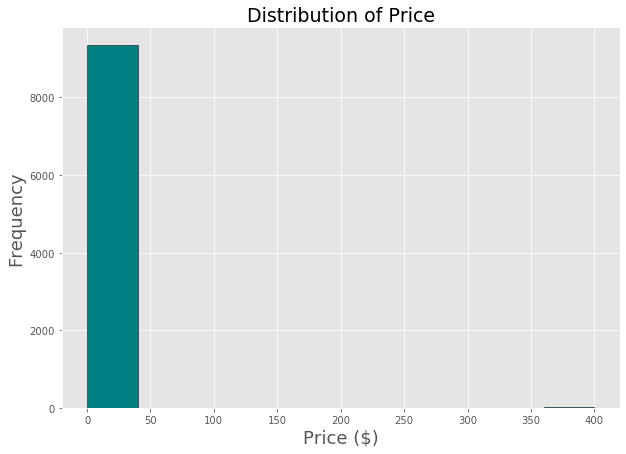

In [38]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Price
df.Price.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Price', size=19)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

In [39]:
# Notice why the plot appears as above

df['Price'].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [40]:
print("Mean price: ",df.Price.mean(), '\n')
print("Max price: ",df.Price.max())

Mean price:  0.9612788461538462 

Max price:  400.0


Now let's see the most expensive app.

In [41]:
df.loc[df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Genres_c
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,4,1,400.0,0,Lifestyle,28


#### Price Normality Test

In [42]:
# Normality test
stat, p = shapiro(df['Price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.031, p=0.000
Sample does not look Gaussian (reject H0)


c:\users\rmfer\desktop\ufm\semestre 7\machine learning models\venv_ml\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Skewness

[Text(0.5, 1.0, 'Skewness')]

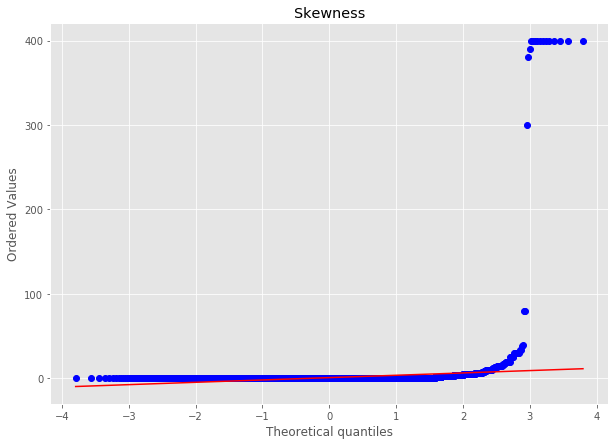

In [43]:
# QQ plot showing left skew and non-normality of very high priced apps (long right tail)

f, ax = plt.subplots(figsize =(10,7)) 
_ = stats.probplot(df['Price'], plot=sns.mpl.pyplot)
ax.set(title='Skewness')

#### Category

Text(0, 0.5, 'Frequency')

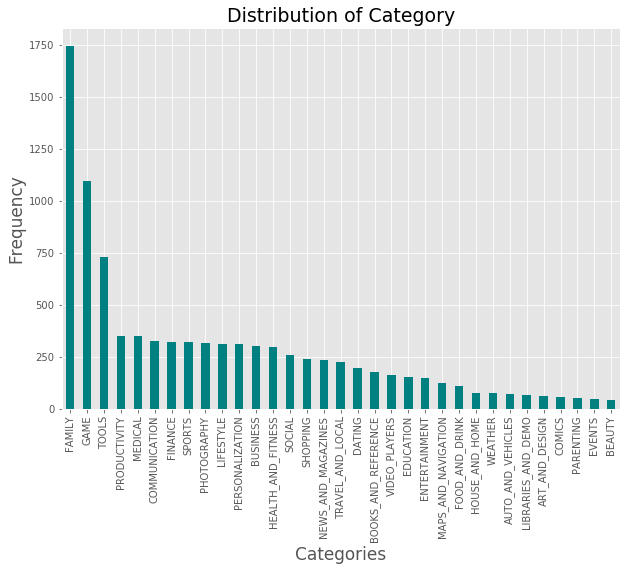

In [44]:
df.Category.value_counts().plot(kind='bar', color='teal', figsize=(10,7))
plt.title('Distribution of Category', size=19)
plt.xlabel('Categories', size=17)
plt.ylabel('Frequency', size=17)

As we can see, the most popular category is Family.

#### Rating

Text(0, 0.5, 'Frequency')

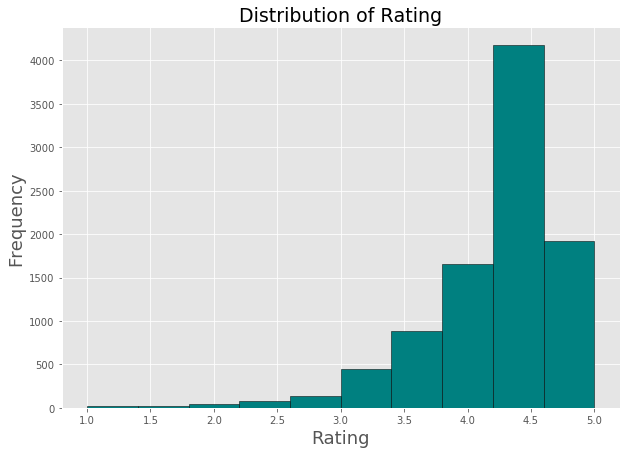

In [45]:
# Distribution plot

plt.style.use('ggplot')

# Histogram of the Rating
df.Rating.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Rating', size=19)
plt.xlabel('Rating', size=18)
plt.ylabel('Frequency', size=18)

In [46]:
# Lets see the mean of Rating

print("Mean Rating: ",df.Rating.mean(), '\n')

Mean Rating:  4.191837606837606 



Most of the apps in the store gets between 4.0 - 4.5 rating, which is very high.

## Correlation

Correlation of the numerical values of the dataframe.

[Text(0.5, 1, 'Correlation')]

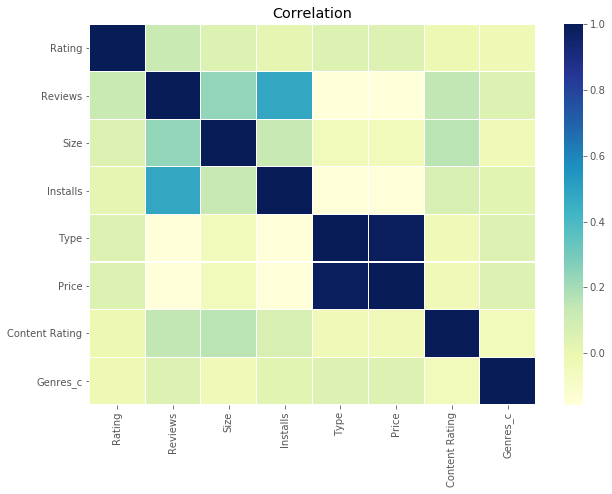

In [47]:
corrmat = df.corr(method='kendall') 
  
f, ax = plt.subplots(figsize =(10,7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
ax.set(title='Correlation')

## Rating vs Installs

### Polynomial regression

We will use the Polynomial Regression of order 3 for this relationship, and let's see how the prediction works...

Text(0.5, 1.0, 'Rating VS Installs')

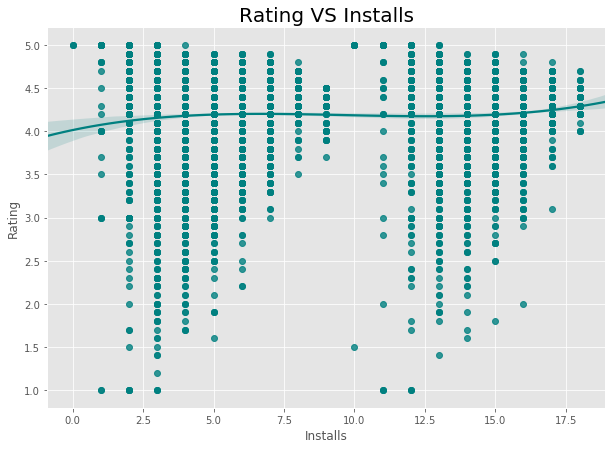

In [48]:
plt.figure(figsize = (10,7))
sns.regplot(x="Installs", y="Rating", color = 'teal', order = 3,data=df);
plt.title('Rating VS Installs',size = 20)

As we can see in the graphic above, it seems like number of install affect in some cases to the rating, but not in all cases. You can have a very small number of downloads, and get good rating, but also, we can get a big number of downloads and gte a higher rating too.

## Rating vs Price

Text(0.5, 1.0, 'Rating VS Price')

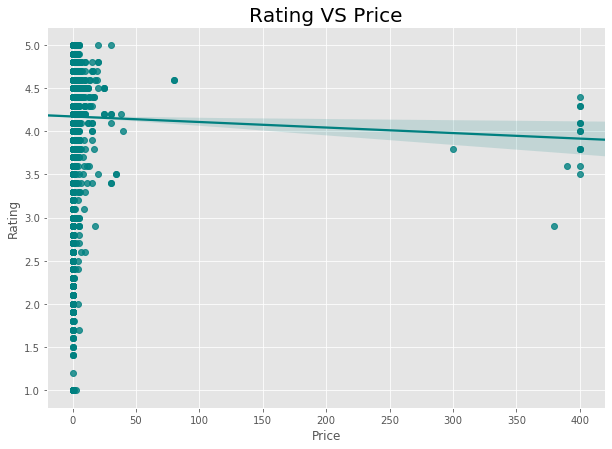

In [49]:
plt.figure(figsize = (10,7))
sns.regplot(x="Price", y="Rating", color = 'teal',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Price',size = 20)

The scatter plot shows that we have outliers, apps that have a very high price, but it's hard to understand and visualize the real relation beetween Price and Rating.

Let's make some categories to the price column.
We will make some intervals to define the categorical value, so we can have a better result and it would be easier to understad.

In [50]:
df.loc[ df['Price'] == 0, 'Price_Cat'] = '1 Free $0'
df.loc[(df['Price'] > 0) & (df['Price'] <= 0.99), 'Price_Cat'] = '2 Cheap ( $0 - $0.99 )'
df.loc[(df['Price'] > 0.99) & (df['Price'] <= 2.99), 'Price_Cat']   = '3 Not cheap ( $0.99 - $2.99 )'
df.loc[(df['Price'] > 2.99) & (df['Price'] <= 4.99), 'Price_Cat']   = '4 Normal ( $2.99 - $4.99 )'
df.loc[(df['Price'] > 4.99) & (df['Price'] <= 14.99), 'Price_Cat']   = '5 Expensive ( $4.99 - $14.99 )'
df.loc[(df['Price'] > 14.99) & (df['Price'] <= 29.99), 'Price_Cat']   = '6 Too expensive ( $14.99 - $29.99 )'
df.loc[(df['Price'] > 29.99), 'Price_Cat']  = '7 Very expensive ( $29.99 - $400.0 )'

In [51]:
df[['Price_Cat', 'Rating']].groupby(['Price_Cat'], as_index=False).mean()

,Price_Cat,Rating
0,1 Free $0,4.186288
1,2 Cheap ( $0 - $0.99 ),4.300943
2,3 Not cheap ( $0.99 - $2.99 ),4.292975
3,4 Normal ( $2.99 - $4.99 ),4.250318
4,5 Expensive ( $4.99 - $14.99 ),4.269149
5,6 Too expensive ( $14.99 - $29.99 ),4.252000
6,7 Very expensive ( $29.99 - $400.0 ),3.923810


Price are not effect to rating, but if the app is very expensive, it might get low rating.

### Installs vs Price

Text(0.5, 1.0, 'Installs VS Price')

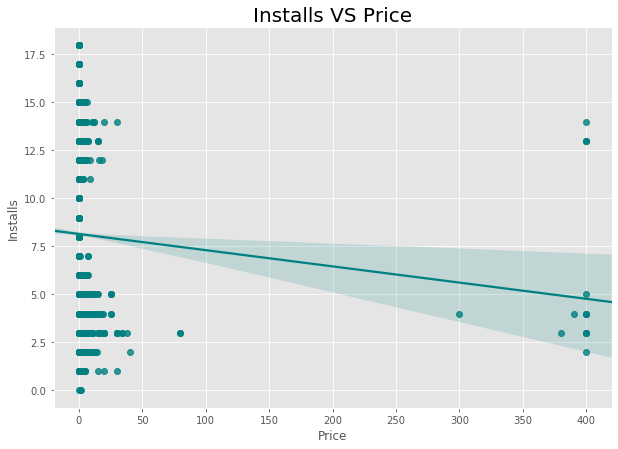

In [52]:
plt.figure(figsize = (10,7))
sns.regplot(x="Price", y="Installs", color = 'teal',data=df[df['Installs']<1000000]);
plt.title('Installs VS Price',size = 20)

As we can see in the Scatter plot above, the number of installs depends on the price of the app. The higher price is the app, the less downloads it gets.

### Rating vs Reviews

Text(0.5, 1.0, 'Rating VS Reveiws')

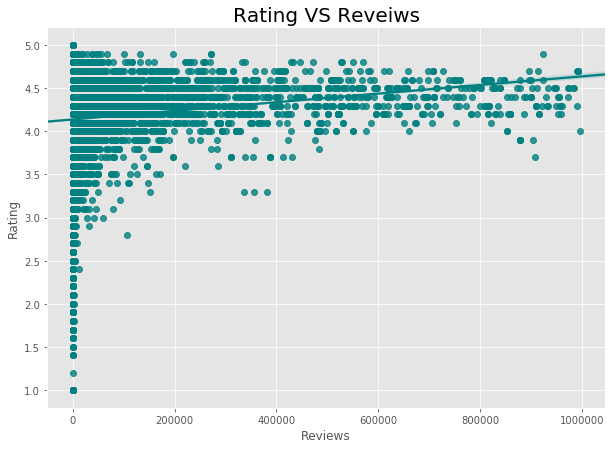

In [53]:
plt.figure(figsize = (10,7))
sns.regplot(x="Reviews", y="Rating", color = 'teal',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

It seems like well-known application will get a good rate from users.

## Multi Linear Regression

We will try to implement a Muti Linear Regression to predict the rating of an app, with numerical values and dummie (one-hot ecoding).

In [54]:
#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c','Size', 'App', 'Price_Cat'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

#dummy encoding

X_d = df_copy.drop(labels = ['Rating','Genres', 'Size', 'App', 'Content Rating', 'Last Updated', 'Current Ver','Android Ver'],axis = 1)
y_d = df_copy.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

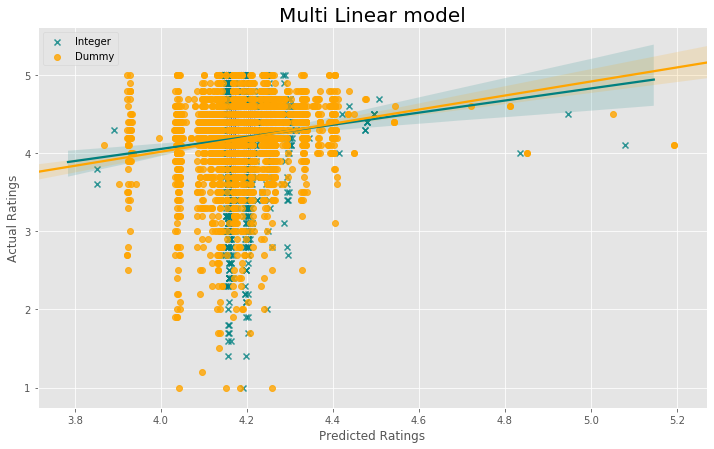

In [55]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Multi Linear model', size = 20)
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()


In [56]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Actual mean of population:4.191837606837606
Integer encoding(mean) :4.186996845244469
Dummy encoding(mean) :4.191027784439877
Integer encoding(std) :0.04592080011836543
Dummy encoding(std) :0.10297153749983401


The Dummy encoding and the integer encoding is almost the same, but Dummy encoding has a larger standard desviation.

## Conclusions

Given the data exploration and the aplication of the methods avobe, I can aswer to my initial questions. So, does the rating of an app depend on the number of downloads of it?, and the answer is no, the number of downloads does not affect the rating. We can say that in some cases, a big number of downloads can assure that the app will have a good rating, but also, apps that have less number of downloads have a good rating too. In the other hand, does the downloads depend on the price of the app?; yes, downloads are affected by the price of the app. The Linear Regression above show us that the higher the price, the fewer downloads.